In [9]:
import pandas as pd
import numpy as np
from numpy.random import random
from scipy import interpolate
import matplotlib.pyplot as plt
import random
import math

In [10]:
df = pd.read_csv('../../projects/data/bolcom-clicks-35m_test.txt', sep='\t')
df

,SessionId,Time,ItemId
0,0008019740_18,1585897352,9200000083733268
1,0008019740_18,1585897382,9200000049819763
2,0008019740_18,1585897392,9200000066323079
3,0008019740_18,1585897506,9200000081546242
4,0008019740_18,1585897633,9200000125623273
...,...,...,...
1211470,zzz7jpx6h6yk34srl558w4zg2eu4h4pm_1,1585921127,9200000065118578
1211471,zzz7jpx6h6yk34srl558w4zg2eu4h4pm_1,1585921160,9200000065118570
1211472,zzz7jpx6h6yk34srl558w4zg2eu4h4pm_1,1585921286,9200000064417495
1211473,zzzjsuzmx87wcp4720be75zq67m2hkx9_14,1585944407,9200000026328200


In [11]:
L_s = np.array(df.groupby('SessionId').size())

In [12]:
L_s.mean()

6.381591769868152

In [13]:
unique, c_l = np.unique(L_s, return_counts=True)
unique, c_l

(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 123, 124, 125, 126, 127, 129, 130, 131, 136, 137, 138,
        141, 150, 151, 152, 156, 159, 168, 174, 179, 184, 188, 199, 225,
        246, 279]),
 array([50468, 33628, 21486, 16344, 11964,  9386,  7310,  6219,  4725,
         3955,  3303,  2718,  2283,  1917,  1642,  1389,  1246,  1053,
          955,   794,   732,   615,

In [14]:
p=c_l/sum(c_l)
p

array([2.65846322e-01, 1.77139576e-01, 1.13180116e-01, 8.60940060e-02,
       6.30218238e-02, 4.94418955e-02, 3.85063132e-02, 3.27593382e-02,
       2.48895116e-02, 2.08334431e-02, 1.73989539e-02, 1.43173953e-02,
       1.20259799e-02, 1.00980304e-02, 8.64943452e-03, 7.31672628e-03,
       6.56345640e-03, 5.54680545e-03, 5.03057854e-03, 4.18249148e-03,
       3.85589895e-03, 3.23958723e-03, 2.73916319e-03, 2.56006405e-03,
       2.36516206e-03, 2.01749904e-03, 1.91214661e-03, 1.68563888e-03,
       1.45386354e-03, 1.28003203e-03, 1.27476441e-03, 1.04825668e-03,
       8.74425171e-04, 8.84960414e-04, 7.16396525e-04, 6.47917446e-04,
       7.37467012e-04, 5.79438366e-04, 5.10959287e-04, 5.42565016e-04,
       4.42480207e-04, 4.53015450e-04, 3.37127777e-04, 2.79183940e-04,
       2.73916319e-04, 3.63465884e-04, 2.94986805e-04, 2.73916319e-04,
       2.15972482e-04, 2.00169617e-04, 1.36958159e-04, 1.52761024e-04,
       1.63296267e-04, 1.15887673e-04, 1.36958159e-04, 1.31690538e-04,
      

In [15]:
cdf = np.cumsum(p)    # cumulative distribution function of a random variable

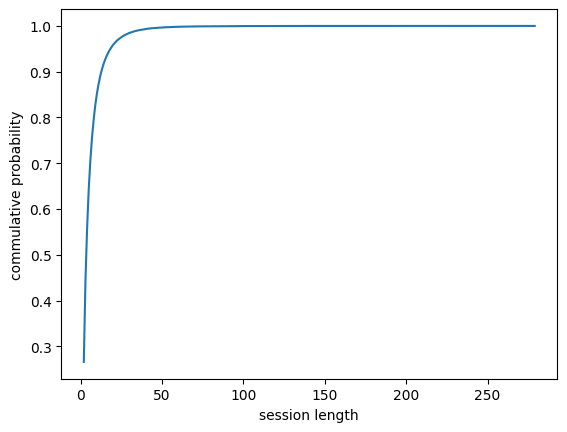

In [16]:
plt.plot(unique, cdf)
plt.xlabel('session length')
plt.ylabel('commulative probability')
plt.show()

In [17]:
inverse_cdf = interpolate.interp1d(cdf, unique, fill_value=min(unique), bounds_error=False, assume_sorted=True)    # this is a function

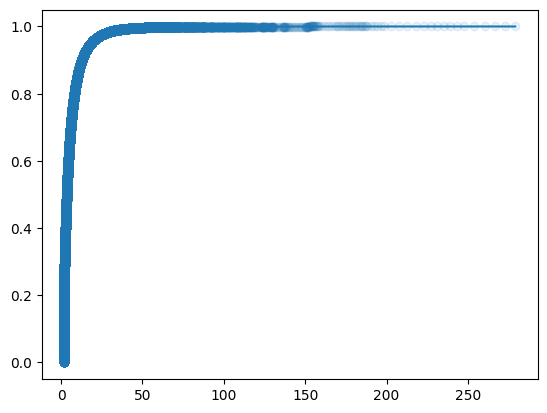

In [18]:
max_i = 1000000
Y = [i/max_i for i in range(max_i + 1)]
X = inverse_cdf(Y)
plt.scatter(X, Y, marker='o', alpha=0.1)
plt.plot(unique, cdf)
plt.show()

In [19]:
I = df['ItemId'].nunique()
N = 10_000
S = N / L_s.mean()

In [20]:
L_s

array([ 6,  4,  3, ..., 39,  7,  2])

In [21]:
def create_session(s, t, I):
    Y = []
    r = random.random()
    l = inverse_cdf(r)
    l = math.ceil(l.flat[0])
    item_ids = np.random.randint(0,I,l)
    for item_id in item_ids:
        Y.append((s, item_id, t))
        t = t + 1
    return Y


In [22]:
t = 0
s = 0
create_session(s, t, I)


[(0, 219519, 0), (0, 181008, 1), (0, 249597, 2)]

In [23]:
Y = []
while s < S:
    l = create_session(s, t, I)
    Y.extend(l)
    s = s + 1
    t = t + 1
print('expected:', N)
print('actual:', len(Y))

expected: 10000
actual: 10447


In [24]:
L_i = np.array(df.groupby('ItemId').size())

In [25]:
# popularity of each ItemId
L_i.sort()
L_i

array([   1,    1,    1, ..., 2186, 2224, 2336])

In [26]:
L_i = np.array(df.groupby('ItemId').size())
unique, c_i = np.unique(L_i, return_counts=True)
unique, c_i

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  132,  133,
         134,  135,  136,  137,  138,  139,  140,  141,  142,  143,  144,
         145,  146,  147,  148,  149, 

In [27]:
p_i=c_i/sum(c_i)
p_i

array([4.71087445e-01, 2.00696183e-01, 1.01487218e-01, 5.96542136e-02,
       3.67121037e-02, 2.59472781e-02, 1.81876206e-02, 1.33563030e-02,
       1.02595319e-02, 8.16743840e-03, 6.53040480e-03, 5.50504260e-03,
       4.56832842e-03, 3.83254978e-03, 3.23860799e-03, 2.88697081e-03,
       2.49987442e-03, 2.05367934e-03, 1.84092407e-03, 1.63998853e-03,
       1.47451221e-03, 1.30608096e-03, 1.21152306e-03, 9.69218449e-04,
       8.86480289e-04, 8.24426669e-04, 8.06697063e-04, 7.21003968e-04,
       6.58950348e-04, 6.29401005e-04, 5.43707911e-04, 5.08248699e-04,
       4.10735867e-04, 4.37330276e-04, 4.46195079e-04, 3.48682247e-04,
       3.45727313e-04, 3.27997707e-04, 3.42772378e-04, 3.27997707e-04,
       2.42304612e-04, 2.77763824e-04, 2.09800335e-04, 1.77296058e-04,
       2.15710204e-04, 2.39349678e-04, 2.06845401e-04, 1.56611518e-04,
       1.50701649e-04, 1.38881912e-04, 1.38881912e-04, 1.44791781e-04,
       1.41836846e-04, 1.09332569e-04, 1.56611518e-04, 1.44791781e-04,
      

In [28]:
item_cdf = np.cumsum(p_i)    # cumulative distribution function of a random variable

In [29]:
item_cdf

array([0.47108745, 0.67178363, 0.77327085, 0.83292506, 0.86963716,
       0.89558444, 0.91377206, 0.92712837, 0.9373879 , 0.94555534,
       0.95208574, 0.95759078, 0.96215911, 0.96599166, 0.96923027,
       0.97211724, 0.97461711, 0.97667079, 0.97851172, 0.98015171,
       0.98162622, 0.9829323 , 0.98414382, 0.98511304, 0.98599952,
       0.98682395, 0.98763065, 0.98835165, 0.9890106 , 0.98964   ,
       0.99018371, 0.99069196, 0.99110269, 0.99154002, 0.99198622,
       0.9923349 , 0.99268063, 0.99300863, 0.9933514 , 0.9936794 ,
       0.9939217 , 0.99419946, 0.99440926, 0.99458656, 0.99480227,
       0.99504162, 0.99524847, 0.99540508, 0.99555578, 0.99569466,
       0.99583354, 0.99597833, 0.99612017, 0.9962295 , 0.99638612,
       0.99653091, 0.99663137, 0.99675844, 0.99689141, 0.99698597,
       0.99706871, 0.99715144, 0.99724305, 0.99732578, 0.9973967 ,
       0.99745285, 0.99751786, 0.99757104, 0.99764196, 0.99768629,
       0.99773357, 0.99778971, 0.99785472, 0.99792564, 0.99798

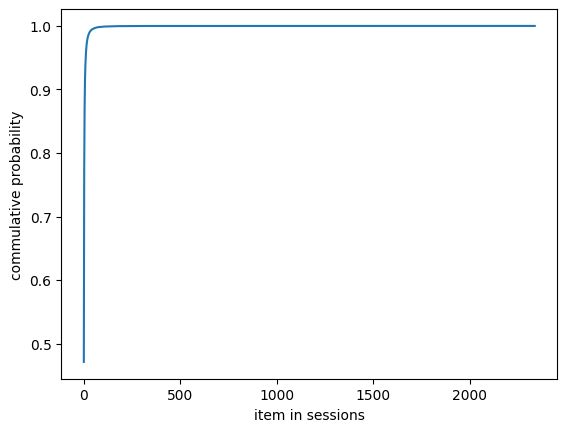

In [30]:
plt.plot(unique, item_cdf)
plt.xlabel('item in sessions')
plt.ylabel('commulative probability')
plt.show()

In [31]:
df.groupby('ItemId')

In [32]:
sum(df.groupby('ItemId').size())

1211475

In [33]:
import random

# Example item distribution
item_freq = {'A': 20, 'B': 30, 'C': 10, 'D': 40}

# Add Laplace smoothing
k = 1
item_freq_smoothed = {k + key: item_freq.get(key, 0) + k for key in range(1, len(item_freq) + 1)}

# Calculate total number of occurrences
total_occurrences = sum(item_freq_smoothed.values())

# Calculate probabilities for each item
item_prob = {k: v / total_occurrences for k, v in item_freq_smoothed.items()}

# Normalize probabilities
norm_prob = {k: v / sum(item_prob.values()) for k, v in item_prob.items()}

# Create a cumulative distribution
cum_dist = {}
cumulative = 0
for k, v in norm_prob.items():
    cumulative += v
    cum_dist[k] = cumulative

# Sample from the distribution
random_num = random.random()
for k, v in cum_dist.items():
    if random_num <= v:
        print("Sampled item:", k)
        break


Sampled item: 5


In [34]:
item_freq_smoothed

{2: 1, 3: 1, 4: 1, 5: 1}

In [35]:
import random
import numpy as np
from sklearn.neighbors import KernelDensity

# Example item distribution
item_freq = {'A': 20, 'B': 30, 'C': 10, 'D': 40}

# Convert frequency dictionary to a list of counts
counts = np.array(list(item_freq.values())).reshape(-1, 1)

# Perform KDE to estimate the density
kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(counts)

# Sample from the estimated density
samples = kde.sample(10)
samples = np.exp(samples).astype(int)

# Assign IDs to the new items
new_items = [f'E{i+1}' for i in range(len(samples))]

# Combine the existing items and the new items
all_items = list(item_freq.keys()) + new_items

# Create a distribution with the combined items
item_freq_all = {k: v for k, v in zip(all_items, np.concatenate((counts, samples)))}

# Calculate total number of occurrences
total_occurrences = sum(item_freq_all.values())

# Calculate probabilities for each item
item_prob = {k: v / total_occurrences for k, v in item_freq_all.items()}

# Normalize probabilities
norm_prob = {k: v / sum(item_prob.values()) for k, v in item_prob.items()}

# Create a cumulative distribution
cum_dist = {}
cumulative = 0
for k, v in norm_prob.items():
    cumulative += v
    cum_dist[k] = cumulative

# Sample from the distribution
random_num = random.random()
for k, v in cum_dist.items():
    if random_num <= v:
        print("Sampled item:", k)
        break

Sampled item: A


In [36]:
norm_prob


{'A': array([5.79475497e-17]),
 'B': array([8.69213245e-17]),
 'C': array([2.89737748e-17]),
 'D': array([1.15895099e-16]),
 'E1': array([2.20024873e-09]),
 'E2': array([2.86260895e-14]),
 'E3': array([1.42217774e-13]),
 'E4': array([2.23448649e-13]),
 'E5': array([3.99454596e-05]),
 'E6': array([0.79527263]),
 'E7': array([7.01484063e-14]),
 'E8': array([0.2045619]),
 'E9': array([1.92744249e-09]),
 'E10': array([0.00012552])}

In [37]:
# Example sample of items
sample = {'A': 5, 'B': 8, 'C': 3}

# Calculate the total count of the sample
total_count = sum(sample.values())

# Calculate the average count per item
avg_count = total_count / len(sample)

# Calculate the slope of the counts
slope = (max(sample.values()) - min(sample.values())) / (len(sample) - 1)

# Calculate the y-intercept of the counts
y_intercept = min(sample.values()) - slope

# Extrapolate the counts for the new items
new_counts = {}
for i in range(len(sample), 10):
    count = int(slope * i + y_intercept)
    new_counts[f'Item{i+1}'] = count

# Combine the observed and extrapolated counts
item_freq = {**sample, **new_counts}

# Calculate total number of occurrences
total_occurrences = sum(item_freq.values())

# Calculate probabilities for each item
item_prob = {k: v / total_occurrences for k, v in item_freq.items()}

# Normalize probabilities
norm_prob = {k: v / sum(item_prob.values()) for k, v in item_prob.items()}

# Create a cumulative distribution
cum_dist = {}
cumulative = 0
for k, v in norm_prob.items():
    cumulative += v
    cum_dist[k] = cumulative

# Sample from the distribution
random_num = random.random()
for k, v in cum_dist.items():
    if random_num <= v:
        print("Sampled item:", k)
        break

Sampled item: Item10


In [38]:
slope

2.5

Sampled item index: 28


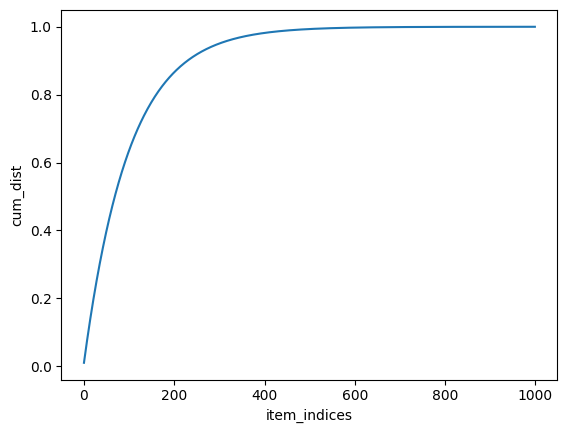

In [39]:
import numpy as np

# Set the number of items and the lambda parameter
n_items = 1000
lam = 0.01

# Create a list of item indices
item_indices = np.arange(n_items)

# Calculate the popularity of each item
popularity = np.exp(-lam * item_indices)

# Normalize the popularity values
popularity /= popularity.sum()

# Create a cumulative distribution
cum_dist = np.cumsum(popularity)

# Sample from the distribution
random_num = np.random.random()
item_idx = np.searchsorted(cum_dist, random_num)
print("Sampled item index:", item_idx)

plt.plot(item_indices, cum_dist)
plt.xlabel('item_indices')
plt.ylabel('cum_dist')
plt.show()

In [40]:
import numpy as np
from scipy.interpolate import interp1d

# Example item frequencies
item_freq = {'1': 5.2, '100': 8.7, '3': 3.1, '2': 2.9}

# Normalize the frequencies and create a sorted list of item IDs and probabilities
item_probs = np.array(list(item_freq.values())) / sum(item_freq.values())
list(zip(item_freq.keys(), item_probs))

[('1', 0.2613065326633166),
 ('100', 0.4371859296482412),
 ('3', 0.15577889447236182),
 ('2', 0.1457286432160804)]

In [41]:
item_ids, item_probs = zip(*sorted(zip(item_freq.keys(), item_probs)))

# Create a linearly interpolated distribution function
interp_func = interp1d(np.cumsum(item_probs), item_ids, kind='linear')

# Sample from the distribution
random_num = np.random.random()
sampled_id = interp_func(random_num)

print("Sampled item ID:", sampled_id)

Sampled item ID: 75.01486591608496


In [42]:
import numpy as np

# Example item frequencies
item_freq = {'A': 5.2, 'B': 8.7, 'C': 3.1, 'D': 2.9}

# Desired number of items
n_items = 20

# Calculate the total frequency of the original items
total_freq = sum(item_freq.values())

# Calculate the frequency of the zero-padded items
zero_freq = (n_items - len(item_freq)) * [0]

# Calculate the normalized frequencies of all the items
all_freq = list(item_freq.values()) + zero_freq
all_probs = np.array(all_freq) / (total_freq + sum(zero_freq))

# Sample from the distribution
sampled_id = np.random.choice(list(item_freq.keys()) + (n_items - len(item_freq)) * ['new_item'], p=all_probs)

print("Sampled item ID:", sampled_id)

Sampled item ID: C


In [45]:
import numpy as np
from scipy.optimize import curve_fit

# Example item frequencies
item_freq = {1: 5.2, 2: 8.7, 3: 3.1, 4: 2.9}

# Normalize the frequencies and create a sorted list of item IDs and probabilities
item_probs = np.array(list(item_freq.values())) / sum(item_freq.values())
item_ids, item_probs = zip(*sorted(zip(item_freq.keys(), item_probs)))

# Define an exponential function for extrapolation
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential function to the observed data
x_data = np.arange(len(item_ids))
popt, pcov = curve_fit(exp_func, x_data, item_probs)

# Generate probabilities for new items using the extrapolated function
new_item_ids = [5, 6,7]  # Example new item IDs
new_item_probs = exp_func(np.arange(len(item_ids), len(item_ids) + len(new_item_ids)), *popt)
new_item_probs /= sum(new_item_probs)  # Normalize the probabilities

# Combine the new item IDs and probabilities with the observed data
all_item_ids = item_ids + tuple(new_item_ids)
all_item_probs = np.concatenate((item_probs, new_item_probs))

# Create a linearly interpolated distribution function
interp_func = interp1d(np.cumsum(all_item_probs), all_item_ids, kind='linear')

# Sample from the distribution
random_num = np.random.random()
sampled_id = interp_func(random_num)

print("Sampled item ID:", sampled_id)

Sampled item ID: 1.1972483140796166


In [47]:
np.sqrt(np.diag(pcov))

array([0.12434898, 0.25735336])